<a href="https://colab.research.google.com/github/IamSamage/GW-Signal-Analysis/blob/main/GW150917_H1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gwpy --quiet

import requests, gzip, shutil
import numpy as np
import matplotlib.pyplot as plt
from gwpy.timeseries import TimeSeries

url = 'https://www.gwosc.org/eventapi/html/GWTC-1-confident/GW150914/v3/H-H1_GWOSC_16KHZ_R1-1126257415-4096.txt.gz'
gz_file = 'H-H1_GWOSC_16KHZ_R1-1126257415-4096.txt.gz'
txt_file = gz_file.replace('.gz', '')

r = requests.get(url)
with open(gz_file, 'wb') as f:
    f.write(r.content)

with gzip.open(gz_file, 'rb') as f_in:
    with open(txt_file, 'wb') as f_out:
        shutil.copyfileobj(f_in, f_out)

In [ ]:
data = np.loadtxt(txt_file)
sample_rate = 16384
start_gps = 1126257415
strain = TimeSeries(data, sample_rate=sample_rate, t0=start_gps)

event_time = 1126259462.4
segment = strain.crop(event_time - 2, event_time + 2)

segment = segment.highpass(5)

q = segment.q_transform(outseg=(event_time - 0.5, event_time + 0.5), frange=(10, 1024))

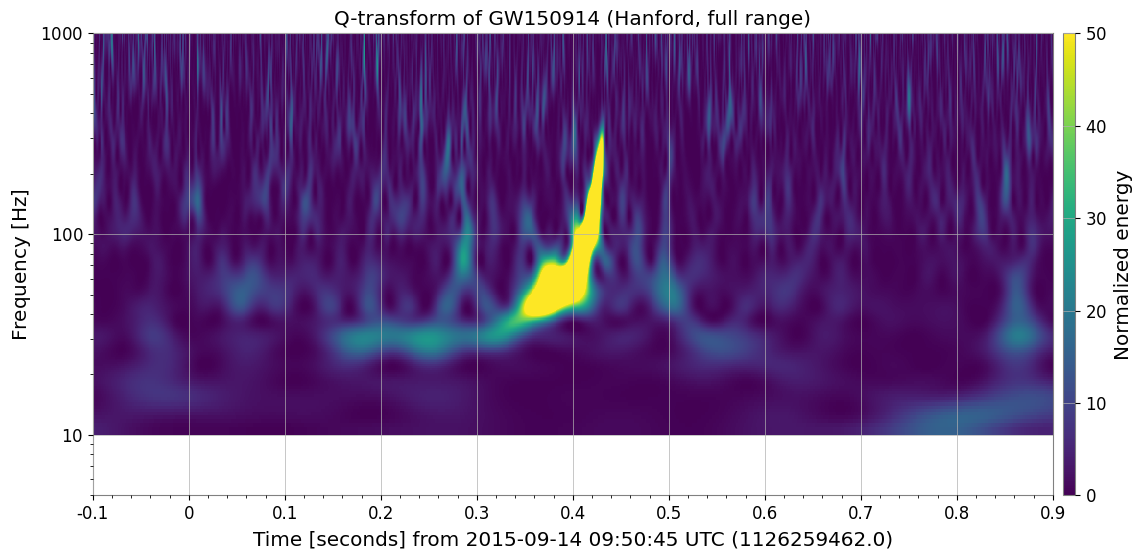

In [ ]:
im = q.plot()
cbar = im.colorbar(label='Normalized energy')
cbar.mappable.set_clim(0, 50)

ax = im.gca()
ax.set_ylim(5, 1000)
ax.set_yscale('log')
ax.set_title("Q-transform of GW150914 (Hanford, full range)")
im.show()
